In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [ ]:
x,y = Variable(x),Variable(y)

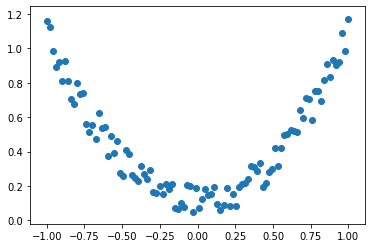

In [10]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

# 1.建立神经网络

In [17]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(n_feature=1,n_hidden=10,n_output=1)
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

# 2.训练网络

In [ ]:
optimizer = optim.SGD(net.parameters(),lr = 0.5)
loss = nn.MSELoss()

for t in range(100):
    prediction = net(x)
    loss = loss(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()